#Coronavirus World Data Analysis
#### In this notebook, we are going to look at a corona virus dataset and attempt to explore the data and answer some questions about the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip nbconvert
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRWK_CN6009_2023/worldometer_corona.csv')
df.head(5)

ERROR: unknown command "nbconvert"


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


# **Data Preparation [10 marks]**
At this stage, you need to manage `Null` (missing) values, use transformation/aggregation methods such as `drop, replace, column rename, etc.` to prepare data for modelling, analysis, and visualization.

In [3]:
#dropped totaltests, WHO region, test/1m pop
df2 = df.drop(columns=['WHO Region', 'Tests/1M pop', 'TotalTests'])
df2.sample

<bound method NDFrame.sample of             Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN   

     TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0       162804.0        NaN       2576668.0           NaN    2292707.0   
1        98644.0        NaN       2047660.0           NaN     771258.0   
2        41638.0        NaN       1377384.0           NaN     606387.0   
3        14606.0        NaN        676357.0           NaN     180931.0   
4         9604.0        NaN        387316.0           NaN     141264.0   
..           ...        ...             ...           ...          ...   
204          1.0        NaN            10.0           NaN          2.0   
205          NaN        NaN             7.0           NaN          6.0   
206          NaN        NaN            13.0           NaN          0.0   
207          NaN        NaN            12.0           NaN          0.0   
208          1.0        NaN             8.0           NaN          1.0   

     Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  
0             18296.0           15194.0          492.0  
1              8318.0           13716.0          464.0  
2              8944.0            1466.0           30.0  
3              2300.0            5974.0          100.0  
4               539.0            9063.0          162.0  
..                ...               ...            ...  
204               NaN            2604.0          200.0  
205               NaN             495.0            NaN  
206               NaN            3726.0            NaN  
207               NaN           14981.0            NaN  
208               NaN              17.0            2.0  

[209 rows x 13 columns]>

Removed unecessary columns

In [4]:
df2. isna(). sum(). sum() #initially 758 nulls in our dataframe, get rid or replace the null values.

758

In [5]:
df2['NewCases'].isna().sum() #205 nulls

205

In [6]:
df2['NewDeaths'].isna().sum() #206 nulls

206

In [7]:
df2['NewRecovered'].isna().sum() #206 nulls

206

Lets replace the missing values with the mean of the filled in values

In [8]:
df2['NewCases'] = df2['NewCases'].fillna(df2["NewCases"].mean())

In [9]:
df2['NewCases']

0      1980.5
1      1980.5
2      1980.5
3      1980.5
4      1980.5
        ...  
204    1980.5
205    1980.5
206    1980.5
207    1980.5
208    1980.5
Name: NewCases, Length: 209, dtype: float64

In [10]:
df2['NewDeaths'] = df2['NewDeaths'].fillna(df2["NewDeaths"].mean())

In [11]:
df2['NewDeaths']

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
204    300.0
205    300.0
206    300.0
207    300.0
208    300.0
Name: NewDeaths, Length: 209, dtype: float64

In [12]:
df2['NewRecovered'] = df2['NewRecovered'].fillna(df2["NewRecovered"].mean())

In [13]:
df2['NewRecovered']

0      1706.0
1      1706.0
2      1706.0
3      1706.0
4      1706.0
        ...  
204    1706.0
205    1706.0
206    1706.0
207    1706.0
208    1706.0
Name: NewRecovered, Length: 209, dtype: float64

In [14]:
df2. isna(). sum(). sum() #141 null values now

141

In [15]:
df2['Serious,Critical'].isna().sum()

87

In [16]:
df2['Serious,Critical'] = df2['Serious,Critical'].fillna(df2["Serious,Critical"].mean())

In [17]:
df2['Serious,Critical']

0      18296.000000
1       8318.000000
2       8944.000000
3       2300.000000
4        539.000000
           ...     
204      534.393443
205      534.393443
206      534.393443
207      534.393443
208      534.393443
Name: Serious,Critical, Length: 209, dtype: float64

In [18]:
df2. isna(). sum(). sum() #at this point we had 54 null values

54

In [19]:
null_cols = df2.isnull().any()
print(null_cols[null_cols == True].index.tolist())

['Continent', 'Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop']


We can continue to fill in the null values with mean values for numerical columns and drop rows if needed

In [20]:
df2['Population'] = df2['Population'].fillna(df2["Population"].mean())

In [21]:
df2['Population']

0      3.311981e+08
1      2.127107e+08
2      1.381345e+09
3      1.459409e+08
4      5.938157e+07
           ...     
204    4.992000e+03
205    2.624700e+04
206    3.489000e+03
207    8.010000e+02
208    5.986820e+05
Name: Population, Length: 209, dtype: float64

In [22]:
df2['TotalDeaths'] = df2['TotalDeaths'].fillna(df2["TotalDeaths"].mean())

In [23]:
df2['TotalDeaths']

0      162804.000000
1       98644.000000
2       41638.000000
3       14606.000000
4        9604.000000
           ...      
204         1.000000
205      3792.590426
206      3792.590426
207      3792.590426
208         1.000000
Name: TotalDeaths, Length: 209, dtype: float64

In [24]:
df2['TotalRecovered'] = df2['TotalRecovered'].fillna(df2["TotalRecovered"].mean())

In [25]:
df2['TotalRecovered']

0      2576668.0
1      2047660.0
2      1377384.0
3       676357.0
4       387316.0
         ...    
204         10.0
205          7.0
206         13.0
207         12.0
208          8.0
Name: TotalRecovered, Length: 209, dtype: float64

In [26]:
df2['ActiveCases'] = df2['ActiveCases'].fillna(df2["ActiveCases"].mean())

In [27]:
df2['ActiveCases']

0      2292707.0
1       771258.0
2       606387.0
3       180931.0
4       141264.0
         ...    
204          2.0
205          6.0
206          0.0
207          0.0
208          1.0
Name: ActiveCases, Length: 209, dtype: float64

Now lets remove rows with nulls in them

In [28]:
df2 = df2[df2['Continent'].notnull()]

In [29]:
df2 = df2[df2['Deaths/1M pop'].notnull()]

In [30]:
df2. isna(). sum(). sum() #at this point, we have 0 null values

0

In [31]:
df2

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,North America,3.311981e+08,5032179,1980.5,162804.0,300.0,2576668.0,1706.0,2292707.0,18296.000000,15194.0,492.0
1,Brazil,South America,2.127107e+08,2917562,1980.5,98644.0,300.0,2047660.0,1706.0,771258.0,8318.000000,13716.0,464.0
2,India,Asia,1.381345e+09,2025409,1980.5,41638.0,300.0,1377384.0,1706.0,606387.0,8944.000000,1466.0,30.0
3,Russia,Europe,1.459409e+08,871894,1980.5,14606.0,300.0,676357.0,1706.0,180931.0,2300.000000,5974.0,100.0
4,South Africa,Africa,5.938157e+07,538184,1980.5,9604.0,300.0,387316.0,1706.0,141264.0,539.000000,9063.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Saint Martin,North America,3.872900e+04,53,1980.5,3.0,300.0,41.0,1706.0,9.0,1.000000,1368.0,77.0
194,Curaçao,North America,1.641610e+05,31,1980.5,1.0,300.0,28.0,1706.0,2.0,534.393443,189.0,6.0
195,Fiji,Australia/Oceania,8.970950e+05,27,1980.5,1.0,300.0,18.0,1706.0,8.0,534.393443,30.0,1.0
204,Montserrat,North America,4.992000e+03,13,1980.5,1.0,300.0,10.0,1706.0,2.0,534.393443,2604.0,200.0




How many countries in `Africa` have more than 300 `TotalDeaths`?

What is the average `ActiveCases` where `Serious,Critical` cases are greater than the mean?

Compare the `TotalDeaths` and `TotalRecovered` for the `North America` countries, using visualization methods, such as bar chart or other methods.


In [32]:
df2[(df2['TotalDeaths'] > 300) & (df2['Continent'] == 'Africa')]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
4,South Africa,Africa,59381566.0,538184,1980.5,9604.0,300.0,387316.0,1706.0,141264.0,539.000000,9063.0,162.0
26,Egypt,Africa,102516525.0,95006,1980.5,4951.0,300.0,48898.0,1706.0,41157.0,41.000000,927.0,48.0
45,Nigeria,Africa,206606300.0,45244,1980.5,930.0,300.0,32430.0,1706.0,11884.0,7.000000,219.0,5.0
54,Algeria,Africa,43926079.0,33626,1980.5,1273.0,300.0,23238.0,1706.0,9115.0,57.000000,766.0,29.0
56,Morocco,Africa,36953359.0,29644,1980.5,449.0,300.0,20553.0,1706.0,8642.0,31.000000,802.0,12.0
61,Kenya,Africa,53881160.0,24411,1980.5,399.0,300.0,10444.0,1706.0,13568.0,44.000000,453.0,7.0
66,Ethiopia,Africa,115223736.0,20900,1980.5,365.0,300.0,9027.0,1706.0,11508.0,185.000000,181.0,3.0
70,Cameroon,Africa,26606188.0,17718,1980.5,391.0,300.0,15320.0,1706.0,2007.0,30.000000,666.0,15.0
78,Sudan,Africa,43943536.0,11780,1980.5,763.0,300.0,6194.0,1706.0,4823.0,534.393443,268.0,17.0


In [33]:
SeriousCritical_more_than_avg = df2['Serious,Critical'] > df2['Serious,Critical'].mean()
activecases1 = df2[SeriousCritical_more_than_avg]['ActiveCases'].mean()
print('Average active cases more than serious,critical average:', SeriousCritical_more_than_avg)

Average active cases more than serious,critical average: 0       True
1       True
2       True
3       True
4      False
       ...  
192    False
194    False
195    False
204    False
208    False
Name: Serious,Critical, Length: 187, dtype: bool


It is a good idea to gauge the max values to understand the graphs more clearly.

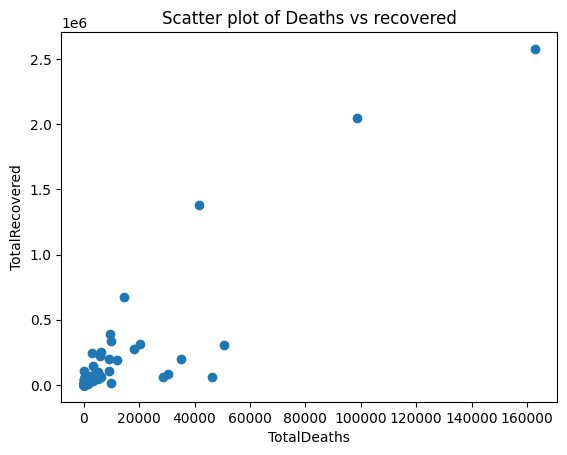

In [34]:
xscatter = df2["TotalDeaths"]
yscatter = df2["TotalRecovered"]
plt.scatter(xscatter, yscatter)
plt.xlabel("TotalDeaths")
plt.ylabel("TotalRecovered")
plt.title("Scatter plot of Deaths vs recovered")
plt.show()

1e6 = 10^6 = 1,000,000

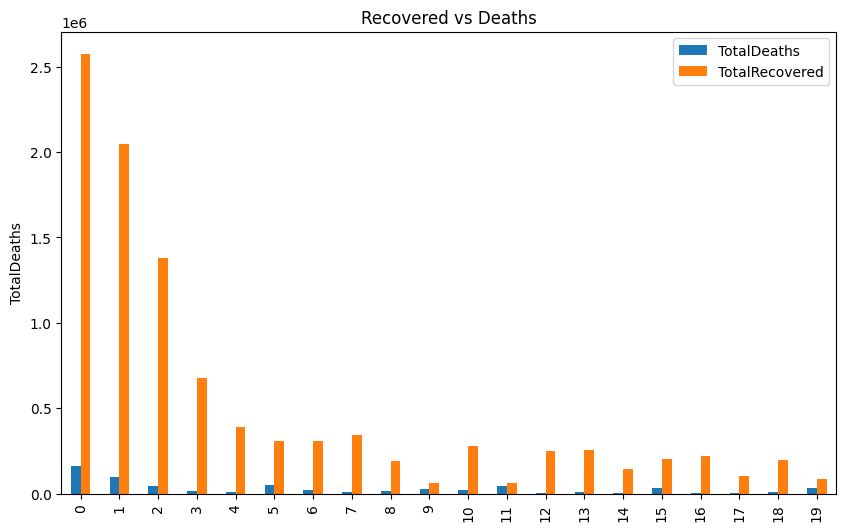

In [35]:
# Plot a bar graph of the sales and expenses columns
ax = df2.head(20)[['TotalDeaths', 'TotalRecovered']].plot(kind='bar', figsize=(10, 6))

# Set the title and labels
ax.set_title('Recovered vs Deaths')
ax.set_ylabel('TotalDeaths')

# Show the plot
plt.show()

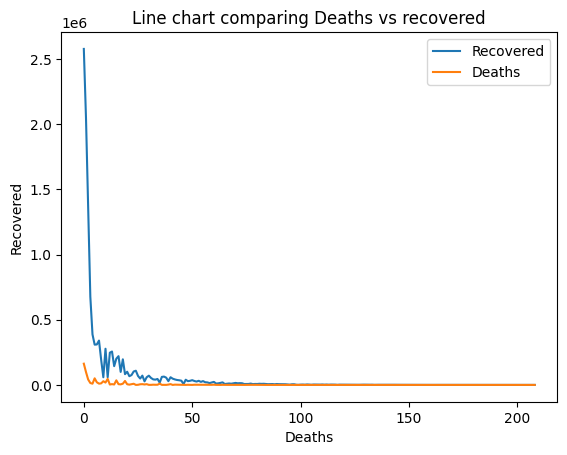

In [36]:
plt.plot(df2['TotalRecovered'], label='Recovered')
plt.plot(df2['TotalDeaths'], label='Deaths')

# Add axis labels and a title
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.title('Line chart comparing Deaths vs recovered')

# Add a legend
plt.legend()

# Display the chart
plt.show()

Now lets look at the Continent of North America

In [37]:
df2_north_america = df2.loc[df2['Continent'] == 'North America']

<Axes: xlabel='TotalRecovered', ylabel='TotalDeaths'>

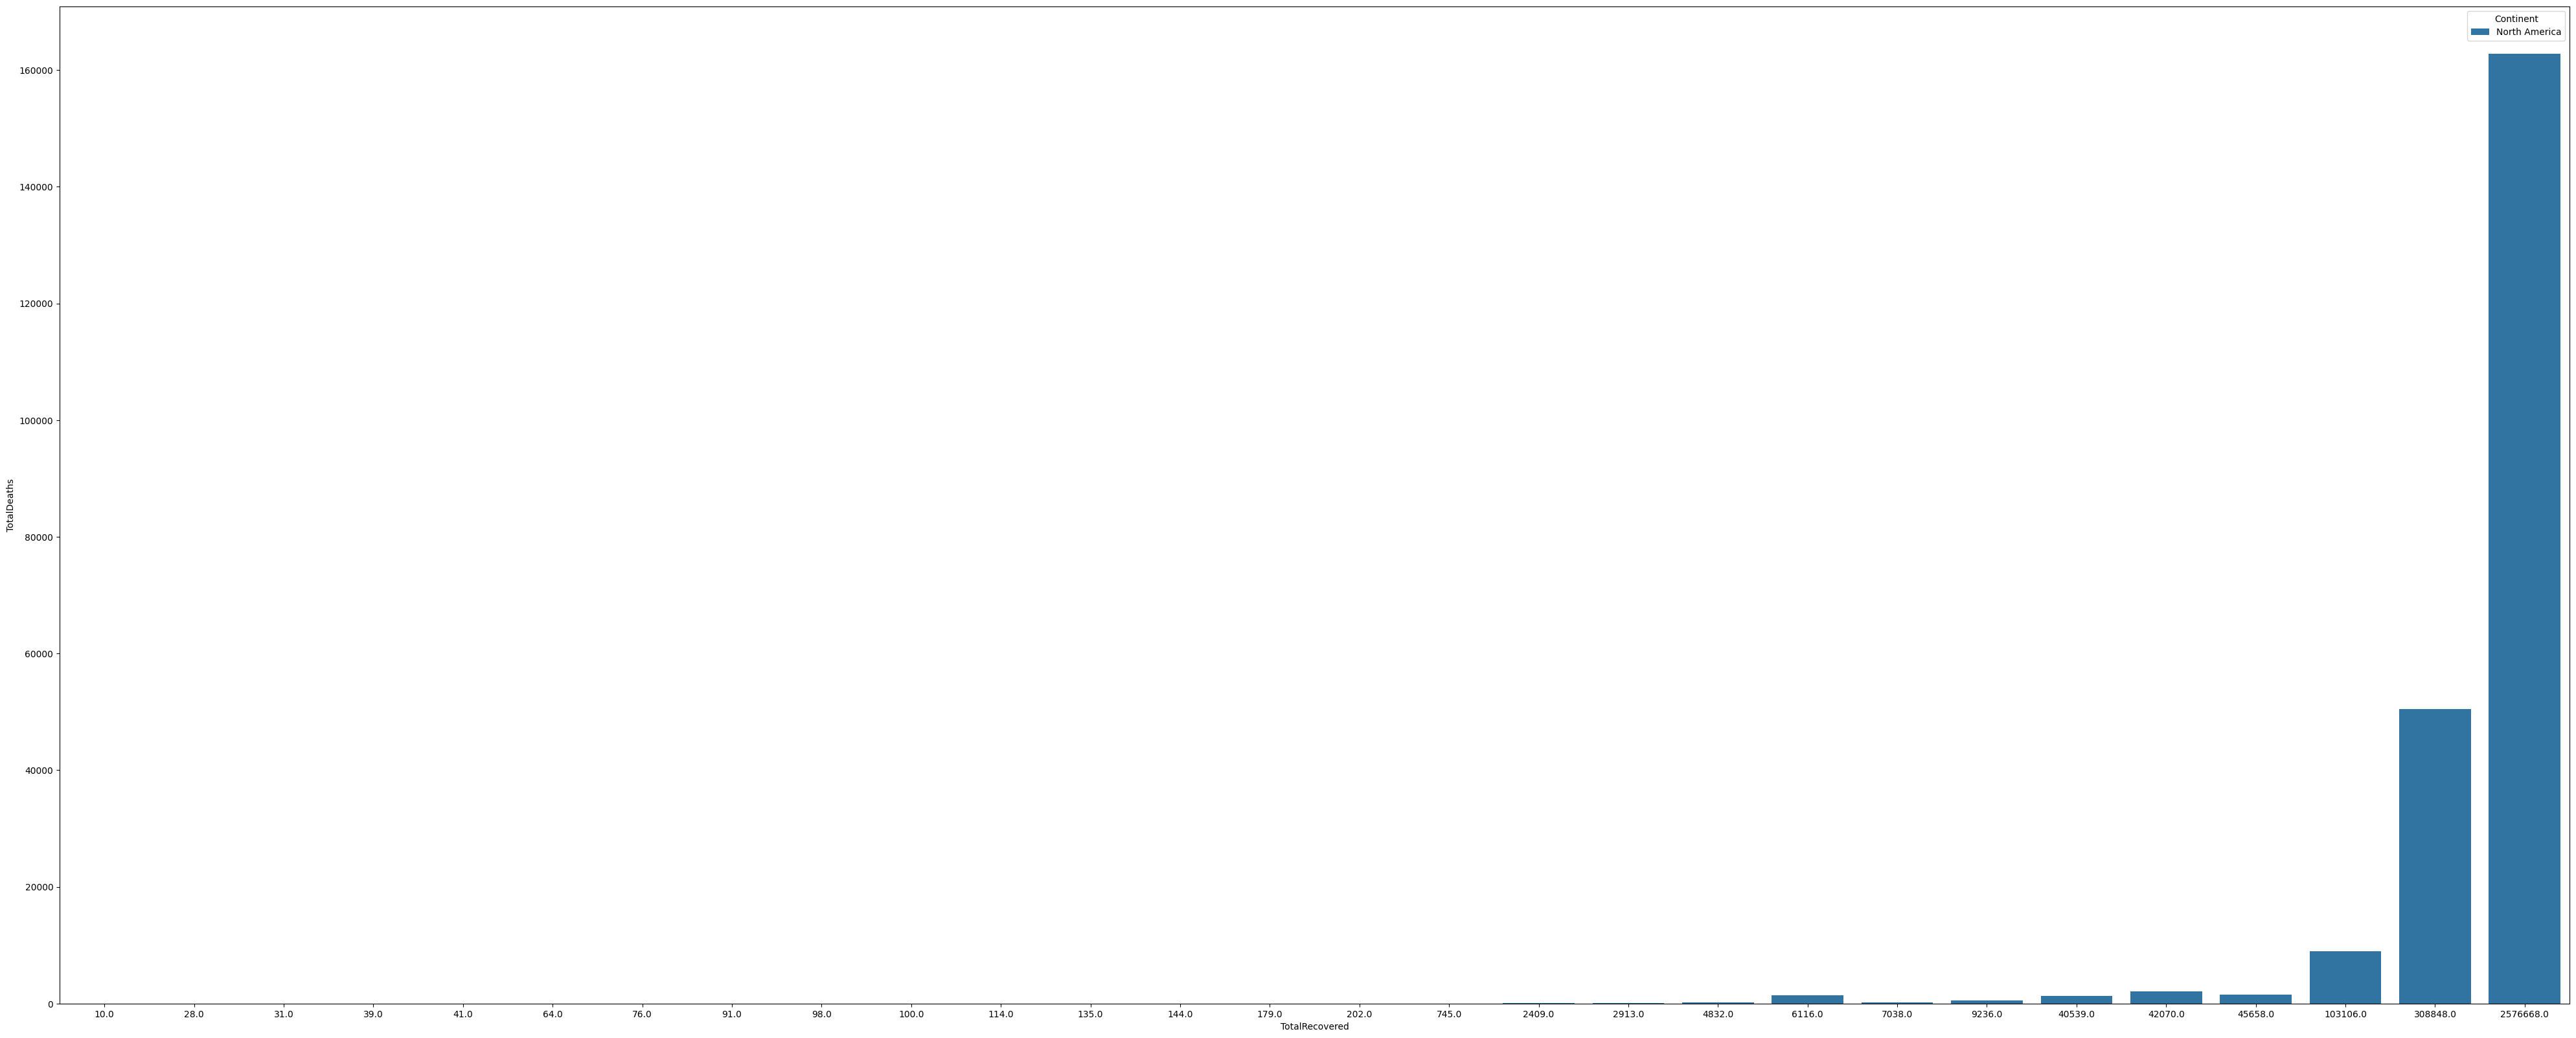

In [38]:
plt.figure(figsize=(50,20))
sns.barplot(x='TotalRecovered', y='TotalDeaths', hue='Continent', data=df2_north_america)

We do not know which countries in North America these stats pertain to, lets find out

In [39]:
selected_columns = ['TotalRecovered', 'TotalDeaths', 'Continent', 'Country/Region']
north_america_df = df2[df2['Continent'] == 'North America']
display_df = north_america_df[selected_columns]
display_df

,TotalRecovered,TotalDeaths,Continent,Country/Region
0,2576668.0,162804.0,North America,USA
5,308848.0,50517.0,North America,Mexico
23,103106.0,8966.0,North America,Canada
33,40539.0,1246.0,North America,Dominican Republic
34,45658.0,1574.0,North America,Panama
42,42070.0,2119.0,North America,Guatemala
46,6116.0,1423.0,North America,Honduras
65,7038.0,200.0,North America,Costa Rica
68,9236.0,513.0,North America,El Salvador
88,4832.0,171.0,North America,Haiti


Now lets look at USA indivdually.

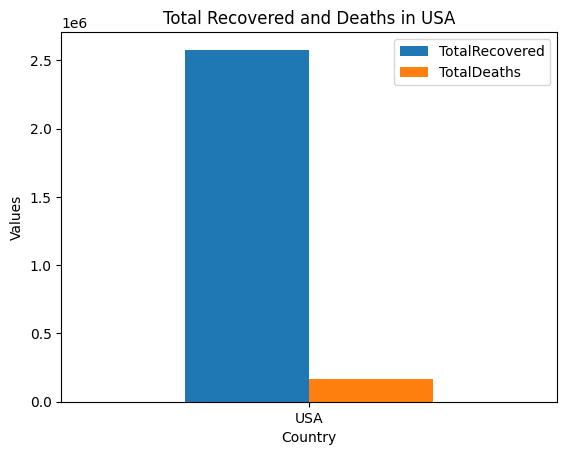

In [40]:
df2_na = df2[df2['Country/Region'] == 'USA']
threshold = 100000  # Set threshold value for TotalRecovered and TotalDeaths columns
df3_na = df2_na[selected_columns].query('TotalRecovered > @threshold and TotalDeaths > @threshold')  # Query for high values
ax = df3_na.plot.bar(x='Country/Region', rot=0)
ax.set_xlabel("Country")
ax.set_ylabel("Values")
ax.set_title("Total Recovered and Deaths in USA")
plt.show()

# **Data Modelling [40 marks]**
**Task 1:** Incorporate 3 Descriptive Statistic methods and Data Visualization to describe and summarize data.

**Task 2:** Define a `function` including a `Series` method, then use `apply()` to execute it over the column(s).

*note*: seaborn and complex methods will be considered for full mark.

*note*: you can use Series methods from here:
https://pandas.pydata.org/docs/reference/series.html

In [41]:
# method 1: add your solution here.
df2.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
count,1.870000e+02,1.870000e+02,187.000000,187.000000,187.00000,1.870000e+02,187.000000,1.870000e+02,187.000000,187.000000,187.000000
mean,3.364411e+07,1.024951e+05,1980.500000,3812.802139,300.00000,6.579370e+04,1706.000000,3.091741e+04,545.786885,3373.379679,98.681176
std,1.100442e+08,4.562410e+05,397.461048,15526.274946,46.78721,2.679818e+05,223.440257,1.826111e+05,1649.556981,5325.132093,174.956862
min,4.992000e+03,1.000000e+01,20.000000,1.000000,1.00000,8.000000e+00,42.000000,0.000000e+00,1.000000,7.000000,0.080000
25%,2.081166e+06,1.215500e+03,1980.500000,22.500000,300.00000,8.330000e+02,1706.000000,2.175000e+02,17.500000,343.500000,6.000000
50%,9.197590e+06,6.375000e+03,1980.500000,119.000000,300.00000,4.974000e+03,1706.000000,1.346000e+03,239.000000,1274.000000,29.000000
75%,2.953669e+07,4.399350e+04,1980.500000,800.000000,300.00000,3.082750e+04,1706.000000,9.567500e+03,534.393443,4042.500000,98.000000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.00000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000


#### Our observations:
- Unfortunately some key columns were missing a LOT of values which have been filled with a fabricated mean value.
- Population max is 1,400,000,000.
- Cases max of 5,000,000
- Overall deaths go to a max of 163,000 with the minimum being 0
- The average no. of cases per one million are 3,373 cases
- The average no. of deaths per one million are 99 deaths
- IQR of population is 27,500,000 (50%)
- This dataset has no obvious target variable, it can be used for clustering not classification
- Africa is responsible for just under 30% of the records due to the number countries in Africa.

<Figure size 10000x10000 with 0 Axes>

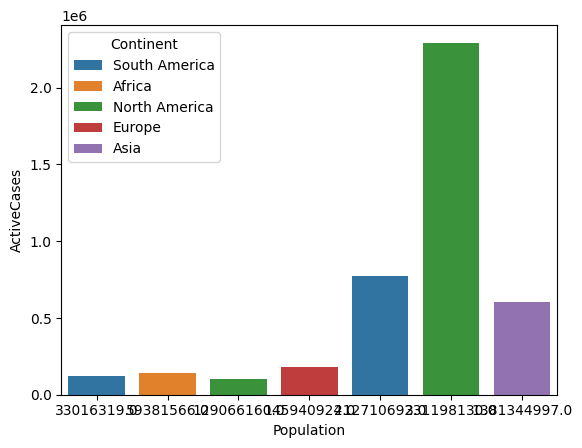

<Figure size 10000x10000 with 0 Axes>

In [42]:
#Method 2:
sns.barplot(data = df2.head(7),
            x = 'Population',
            y = 'ActiveCases',
            hue = 'Continent');
plt.figure(figsize=(100, 100))

Here we compare random instances of population vs cases

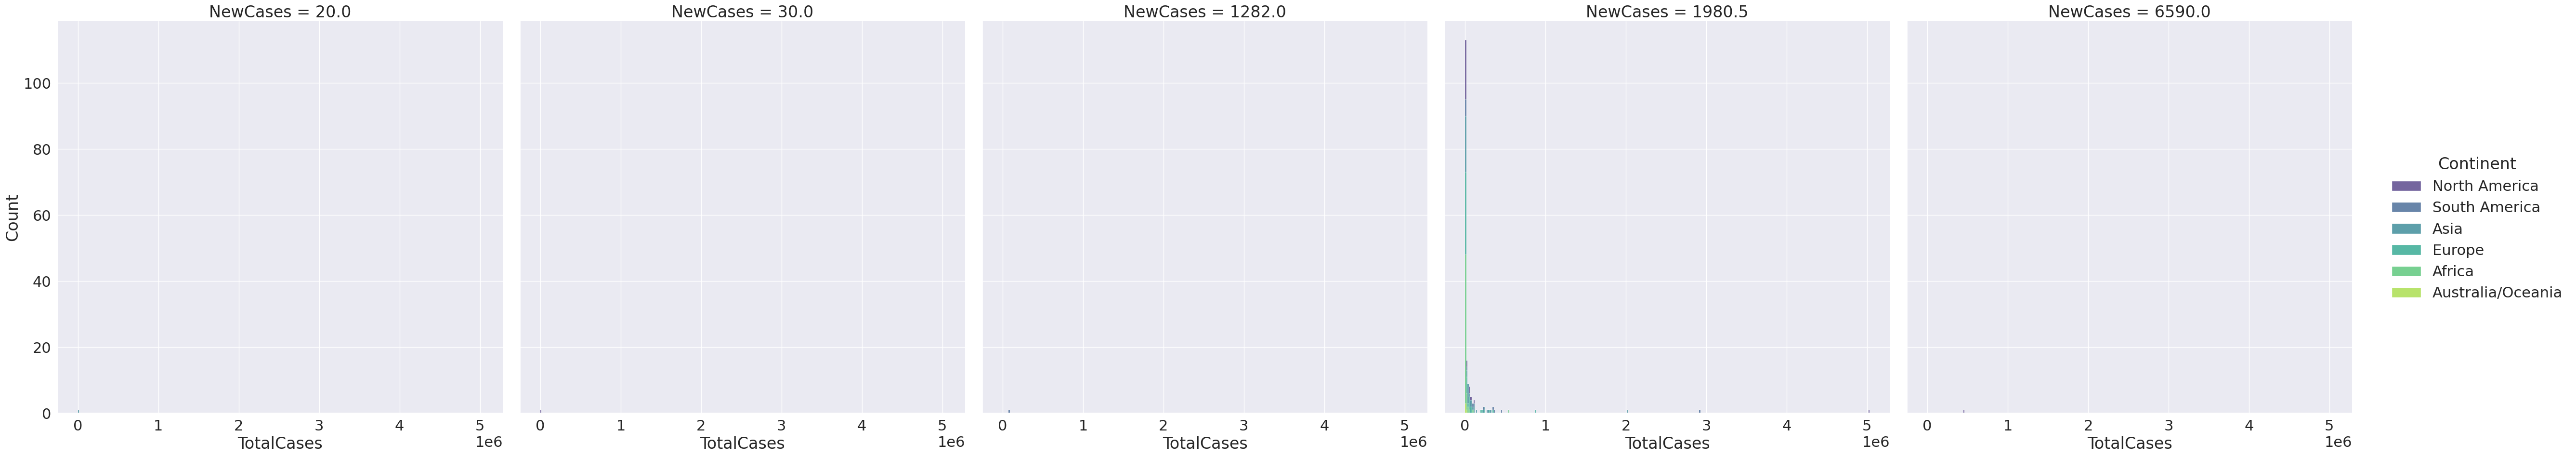

In [43]:
sns.set(font_scale = 2)
sns.displot(data = df2, x = 'TotalCases', col = 'NewCases',
            hue = 'Continent', multiple = 'stack',
            height = 10, palette = 'viridis');

Here we compare totalcases to newcases based on the continent. The reason for the biased distribution of results is because NewCases was filled with the mean and 95% of those are in one graph

In [ ]:
sns.pairplot(df2)
plt.show()

This pairplot function puts each feature against each other to show us the relationship between one another.

In [ ]:
df2.hist(['Population', 'NewDeaths'], figsize = (20,5));

Most new deaths are the value 300 due to the mean value. 1e9 = 10^9 = 1,000,000,000

In [ ]:
plt.figure(figsize = (10,5))
sns.set(font_scale = 1.5)
sns.boxplot(data = df2.head(5), x = "Tot Cases/1M pop", y = "Deaths/1M pop", hue = "Continent");

In [ ]:
#Method 3:
df2.groupby('Continent').mean().sort_values(by = 'Population', ascending = True)

In [ ]:
df2[['Continent', 'TotalDeaths']].groupby('Continent').mean().sort_values(by = 'Continent', ascending = True)

Although Africa has the most records, South America is the continent responsible for the most deaths

In [ ]:
df2[['Country/Region', 'Tot Cases/1M pop']].groupby('Country/Region').mean().sort_values(by = 'Country/Region', ascending = True)

All countries/regions and their total cases per 1,000,000 population

In [ ]:
def mean_aggregation(data, Split1, Split2, Agg_feature):
  return data.groupby([Split1, Split2])[Agg_feature].mean()

In [ ]:
mean_aggregation(df2, 'Continent', 'Country/Region', 'ActiveCases').to_frame()

The function above allows us to show the mean of activecases for countries/regions and their respective continent

In [ ]:
# Task 2 - add your solution here.

# define a function to calculate the mean of newcases
def mean_if_numeric(NewCases):
    if pd.api.types.is_numeric_dtype(NewCases):
        return NewCases.mean()
    else:
        return NewCases
# apply the function to all columns using apply()
df3 = df2.apply(mean_if_numeric)


This makes ALL of the numeric columns an average value.

In [ ]:
df3